In [1]:
import json
import xarray as xr
import geopandas as gpd

from xcube.core.store import new_data_store
from xcube.core.geom import rasterize_features
from xcube.core.geom import mask_dataset_by_geometry

---
### Open Country Geometries

<AxesSubplot:>

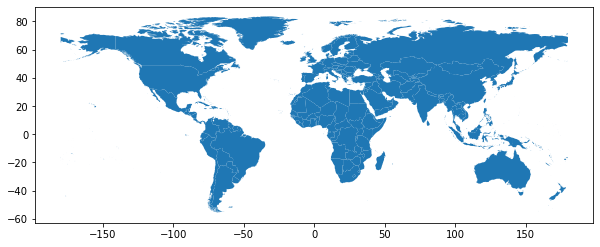

In [2]:
with open('../resources/countries-50m.geojson') as fp:
    features = json.load(fp)
features

features = gpd.GeoDataFrame.from_features(features)
features.plot(figsize=(10, 10))

In [3]:
#features

In [4]:
desired_point = dict(lon=38., lat=0.)
desired_country = 'Kenya'

# desired_point = dict(lon=-4.75, lat=40.35)
# desired_country = 'Spain'

desired_feature = features.loc[features['sovereignt'] == desired_country]
desired_feature

,geometry,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename
127,"MULTIPOLYGON (((40.99443 -2.15840, 40.95732 -2...",1,Admin-0 country,2,Kenya,KEN,0,2,Sovereign country,Kenya,...,Africa,Africa,Eastern Africa,Sub-Saharan Africa,5,5,4,-99,1,KEN.geojson


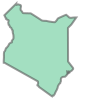

In [5]:
desired_geometry = desired_feature.iloc[0].geometry
desired_geometry

---
### Inspect CCI-Toolbox' Zarr Store (high performance data access)

In [6]:
store = new_data_store('ccizarr')

In [7]:
list(store.get_data_ids())

['BICEP-OC-L3S-PP-MERGED-1M_MONTHLY_9km_mapped-1998-2020-fv4.2.zarr',
 'ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-OC-L3S-IOP-MERGED-1M_MONTHLY_4km_GEO_PML_OCx_QAA-1997-2020-fv5.0.zarr',
 'ESACCI-PERMAFROST-L4-ALT-MODISLST-AREA4_PP-1997-2018-fv02.0.zarr',
 'ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-2002-2012-fv2.0.zarr',
 'ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-2002-2012-fv2_4326.zarr',
 'ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-2002-2012-fv2_repro.zarr',
 'ESACCI-SEAICE-L3C-SITHICK

---
### Open Land Cover ECV

In [8]:
lc_dataset = store.open_data('ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr')
lc_dataset

,Array,Chunk
Bytes,750.85 GiB,12.81 MiB
Shape,"(24, 64800, 129600)","(1, 2592, 1296)"
Count,60001 Tasks,60000 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,750.85 GiB,12.81 MiB
Shape,"(24, 64800, 129600)","(1, 2592, 1296)"
Count,60001 Tasks,60000 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
lc_dataset.lccs_class

,Array,Chunk
Bytes,750.85 GiB,12.81 MiB
Shape,"(24, 64800, 129600)","(1, 2592, 1296)"
Count,60001 Tasks,60000 Chunks
Type,float32,numpy.ndarray


In [10]:
lc_dataset.time

<xarray.DataArray 'time' (time: 24)>
array(['1992-07-02T00:00:00.000000000', '1993-07-03T00:00:00.000000000',
       '1994-07-03T00:00:00.000000000', '1995-07-03T00:00:00.000000000',
       '1996-07-02T00:00:00.000000000', '1997-07-03T00:00:00.000000000',
       '1998-07-03T00:00:00.000000000', '1999-07-03T00:00:00.000000000',
       '2000-07-02T00:00:00.000000000', '2001-07-03T00:00:00.000000000',
       '2002-07-03T00:00:00.000000000', '2003-07-03T00:00:00.000000000',
       '2004-07-02T00:00:00.000000000', '2005-07-03T00:00:00.000000000',
       '2006-07-03T00:00:00.000000000', '2007-07-03T00:00:00.000000000',
       '2008-07-02T00:00:00.000000000', '2009-07-03T00:00:00.000000000',
       '2010-07-03T00:00:00.000000000', '2011-07-03T00:00:00.000000000',
       '2012-07-02T00:00:00.000000000', '2013-07-03T00:00:00.000000000',
       '2014-07-03T00:00:00.000000000', '2015-07-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1992-07-02 1993-07-03 ... 2015-07-03

In [11]:
lc_dataset_subset = mask_dataset_by_geometry(lc_dataset, desired_geometry, all_touched=True)

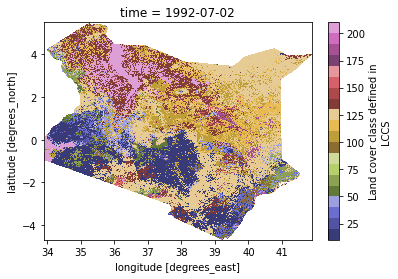

In [12]:
lc_dataset_subset.lccs_class.isel(time=0).plot.imshow(cmap="tab20b")

---
### Open Soil Moisture ECV

In [13]:
sm_dataset = store.open_data('ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-1978-2020-fv05.3.zarr')
sm_dataset

<xarray.Dataset>
Dimensions:         (time: 15402, lat: 720, lon: 1440)
Coordinates:
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time            (time) datetime64[ns] 1978-11-01 1978-11-02 ... 2020-12-31
Data variables:
    dnflag          (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    flag            (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    freqbandID      (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    mode            (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    sensor          (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    sm              (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    sm_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    t0              (time, lat, lon) datetime64[ns] dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
Attributes: (12/40)
    Conventions:                CF-1.7
    cdm_data_type:              Grid
    comment:                    This dataset was produced with funding of the...
    contact:                    cci_sm_contact@eodc.eu
    creator_email:              cci_sm_contact@eodc.eu
    creator_name:               Department of Geodesy and Geoinformation, Tec...
    ...                         ...
    time_coverage_duration:     P42Y
    time_coverage_end:          2020-12-31 00:00:00
    time_coverage_resolution:   P1D
    time_coverage_start:        1978-11-01 00:00:00
    title:                      ESA CCI Surface Soil Moisture COMBINED active...
    tracking_id:                174f51a4-6a06-4352-a712-4d3f77bd8166

In [14]:
sm_dataset.sm

<xarray.DataArray 'sm' (time: 15402, lat: 720, lon: 1440)>
dask.array<open_dataset-98728e7a79e12bf25f7f3beb0e7d72casm, shape=(15402, 720, 1440), dtype=float32, chunksize=(16, 720, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 1978-11-01 1978-11-02 ... 2020-12-31
Attributes:
    _CoordinateAxes:  time lat lon
    dtype:            float32
    long_name:        Volumetric Soil Moisture
    units:            m3 m-3
    valid_range:      [0.0, 1.0]

In [15]:
sm_dataset_subset = mask_dataset_by_geometry(sm_dataset, desired_geometry, all_touched=True)

In [16]:
sm_dataset_subset_annual = sm_dataset_subset.resample(time='1Y').mean()

In [17]:
sm_dataset_subset_annual.sm.time

<xarray.DataArray 'time' (time: 43)>
array(['1978-12-31T00:00:00.000000000', '1979-12-31T00:00:00.000000000',
       '1980-12-31T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-12-31T00:00:00.000000000', '1983-12-31T00:00:00.000000000',
       '1984-12-31T00:00:00.000000000', '1985-12-31T00:00:00.000000000',
       '1986-12-31T00:00:00.000000000', '1987-12-31T00:00:00.000000000',
       '1988-12-31T00:00:00.000000000', '1989-12-31T00:00:00.000000000',
       '1990-12-31T00:00:00.000000000', '1991-12-31T00:00:00.000000000',
       '1992-12-31T00:00:00.000000000', '1993-12-31T00:00:00.000000000',
       '1994-12-31T00:00:00.000000000', '1995-12-31T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1997-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', '1999-12-31T00:00:00.000000000',
       '2000-12-31T00:00:00.000000000', '2001-12-31T00:00:00.000000000',
       '2002-12-31T00:00:00.000000000', '2003-12-31T00:00:00.000000000',
       '2004-12-31T00:00:00.000000000', '2005-12-31T00:00:00.000000000',
       '2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1978-12-31 1979-12-31 ... 2020-12-31

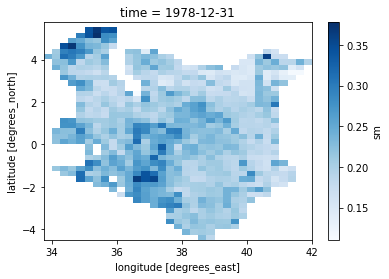

In [18]:
sm_dataset_subset_annual.sm.isel(time=0).plot.imshow(cmap="Blues")

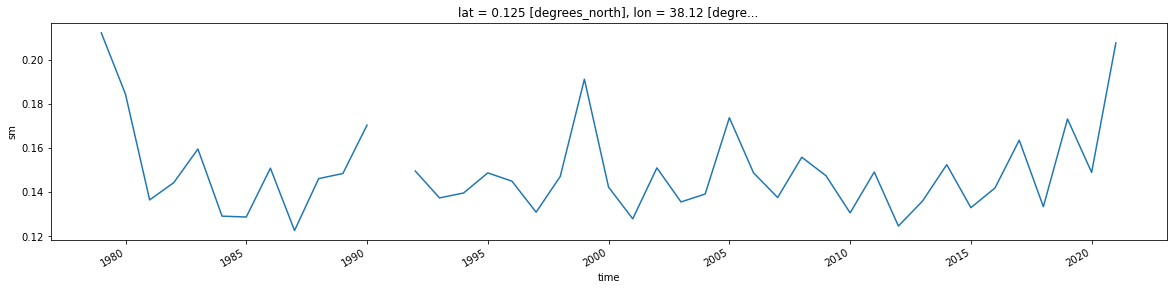

In [19]:
sm_dataset_subset_annual.sm.sel(**desired_point, method='nearest').plot(figsize=(20, 4))

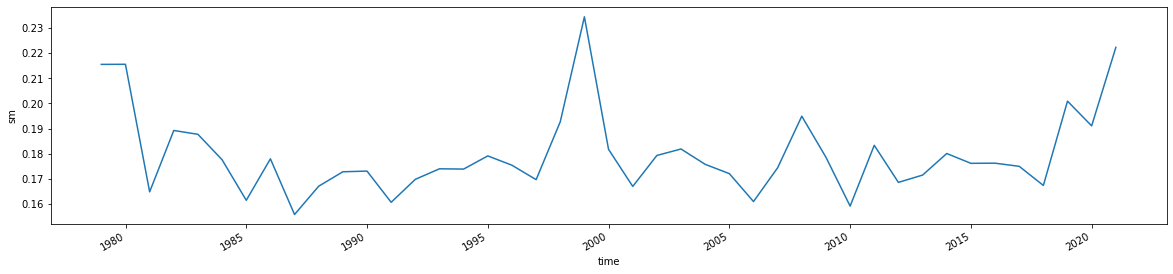

In [20]:
sm_dataset_subset_annual.sm.mean(dim=['lat','lon']).plot(figsize=(20, 4))

---
### Combination

In [21]:
desired_year = '2015-01-01'

In [22]:
lc = lc_dataset_subset.lccs_class.sel(time=desired_year, method='nearest')
lc

<xarray.DataArray 'lccs_class' (lat: 3668, lon: 2876)>
dask.array<getitem, shape=(3668, 2876), dtype=float32, chunksize=(2592, 1296), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 5.496 5.493 5.49 5.488 ... -4.682 -4.685 -4.688 -4.69
  * lon      (lon) float32 33.9 33.9 33.9 33.91 ... 41.88 41.88 41.88 41.88
    time     datetime64[ns] 2014-07-03
Attributes:
    ancillary_variables:  processed_flag current_pixel_state observation_coun...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    flag_values:          [0, 10, 11, 12, 20, 30, 40, 50, 60, 61, 62, 70, 71,...
    long_name:            Land cover class defined in LCCS
    standard_name:        land_cover_lccs
    valid_max:            220
    valid_min:            1

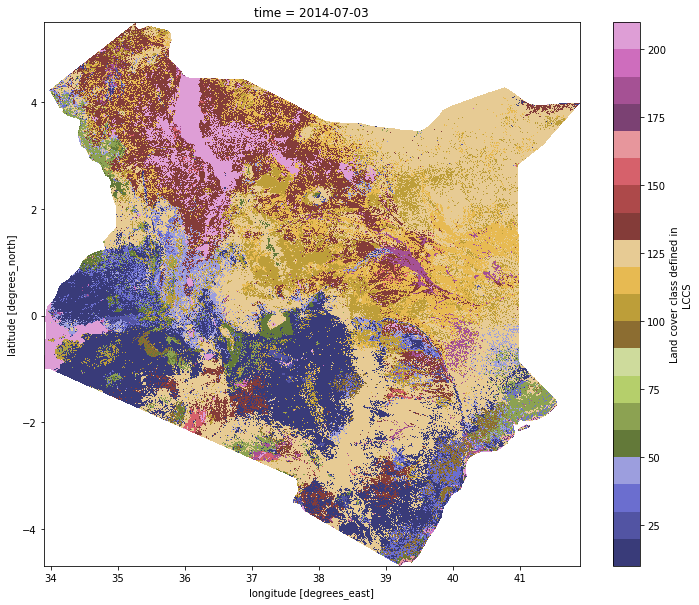

In [23]:
lc.plot.imshow(cmap="tab20b", figsize=(12, 10))

In [24]:
sm = sm_dataset_subset_annual.sm.sel(time=desired_year, method='nearest')
sm

<xarray.DataArray 'sm' (lat: 41, lon: 33)>
dask.array<getitem, shape=(41, 33), dtype=float32, chunksize=(41, 33), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2014-12-31
  * lat      (lat) float64 5.625 5.375 5.125 4.875 ... -3.875 -4.125 -4.375
  * lon      (lon) float64 33.88 34.12 34.38 34.62 ... 41.12 41.38 41.62 41.88

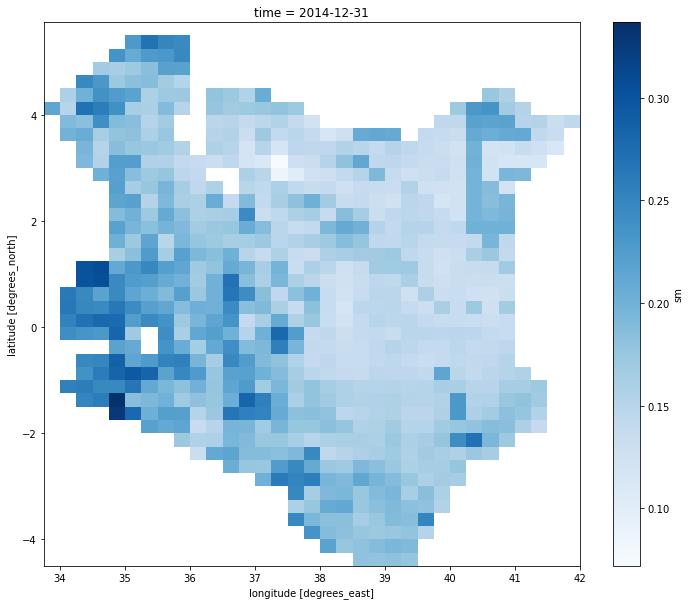

In [25]:
sm.plot.imshow(cmap='Blues', figsize=(12, 10))